# Done by -> Abhishek Kulkarni

## Uber data analysis

In [17]:
import numpy as np # linear algebra
import pandas as pd # data processing
import matplotlib.pyplot as plt # data visualization
import seaborn as sns # data visualization


file_path= r"C:\Users\amkb2\Downloads\archive (5)\uber-raw-data-jul14.csv"
df = pd.read_csv(file_path)
df.head()

,Date/Time,Lat,Lon,Base
0,7/1/2014 0:03:00,40.7586,-73.9706,B02512
1,7/1/2014 0:05:00,40.7605,-73.9994,B02512
2,7/1/2014 0:06:00,40.7320,-73.9999,B02512
3,7/1/2014 0:09:00,40.7635,-73.9793,B02512
4,7/1/2014 0:20:00,40.7204,-74.0047,B02512


In [18]:
df['Date/Time'] = pd.to_datetime(df['Date/Time'], format="%m/%d/%Y %H:%M:%S")
df['DayOfWeekNum'] = df['Date/Time'].dt.dayofweek
df['DayOfWeek'] = df['Date/Time'].dt.day_name()
df['MonthDayNum'] = df['Date/Time'].dt.day
df['HourOfDay'] = df['Date/Time'].dt.hour
df.head()

,Date/Time,Lat,Lon,Base,DayOfWeekNum,DayOfWeek,MonthDayNum,HourOfDay
0,2014-07-01 00:03:00,40.7586,-73.9706,B02512,1,Tuesday,1,0
1,2014-07-01 00:05:00,40.7605,-73.9994,B02512,1,Tuesday,1,0
2,2014-07-01 00:06:00,40.7320,-73.9999,B02512,1,Tuesday,1,0
3,2014-07-01 00:09:00,40.7635,-73.9793,B02512,1,Tuesday,1,0
4,2014-07-01 00:20:00,40.7204,-74.0047,B02512,1,Tuesday,1,0


In [19]:
weekday = df.pivot_table(index=['DayOfWeek'],
                                  values='Base',
                                  aggfunc='count')
weekday.head()


,Base
DayOfWeek,
Friday,102735
Monday,93189
Saturday,90260
Sunday,76327
Thursday,148439


In [20]:
weekdayAverage= weekday/30
weekdayAverage.head()

,Base
DayOfWeek,
Friday,3424.500000
Monday,3106.300000
Saturday,3008.666667
Sunday,2544.233333
Thursday,4947.966667


Text(0.5, 1.0, 'Average Rides per Day vs Day of Week')

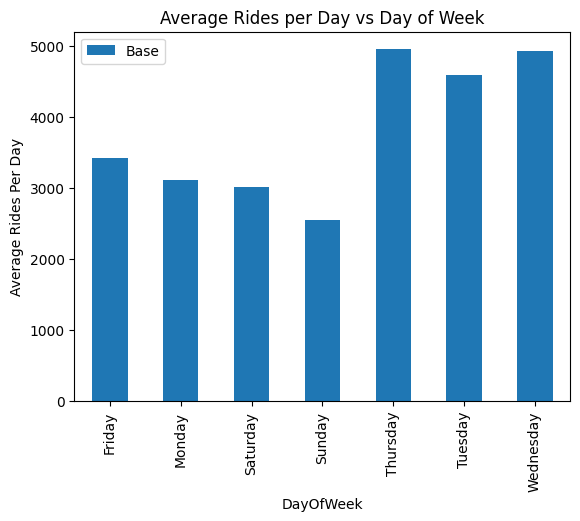

In [21]:
weekdayAverage.plot(kind='bar')
plt.ylabel('Average Rides Per Day')
plt.title('Average Rides per Day vs Day of Week')

Text(0.5, 1.0, 'Number of Rides vs Hour of Day')

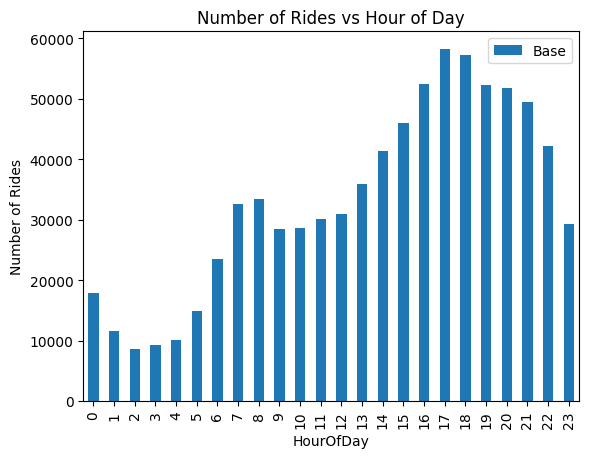

In [22]:
Hours = df.pivot_table(index=['HourOfDay'],
                                  values='Base',
                                  aggfunc='count')
Hours/30
Hours.plot(kind='bar')
plt.ylabel('Number of Rides')
plt.title('Number of Rides vs Hour of Day')

<Axes: xlabel='HourOfDay'>

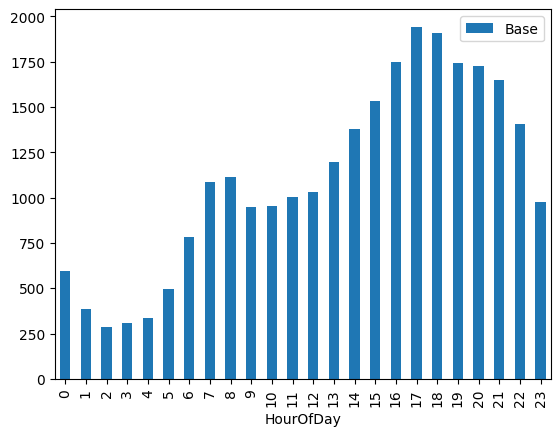

In [23]:
avgHours=Hours/30
avgHours.plot(kind='bar')

In [24]:
df['MinOfDay'] = df['Date/Time'].dt.hour * 60 + df['Date/Time'].dt.minute

(16500.0, 18000.0)

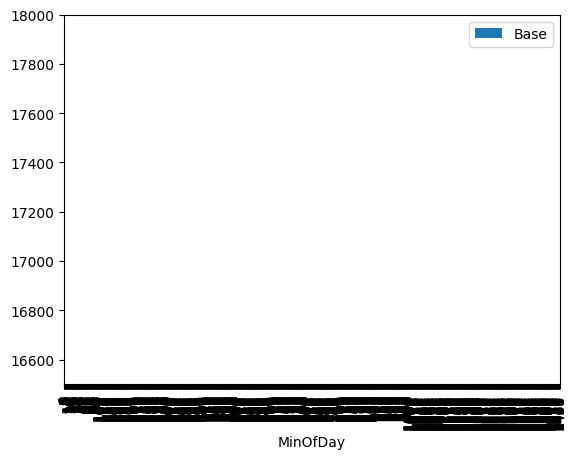

In [25]:
min = df.pivot_table(index=['MinOfDay'], values='Base', aggfunc='count')
min.plot(kind='bar')
plt.ylim(16500,18000)



In [26]:
min.max()
#minute 10

Base    1139
dtype: int64

In [27]:
min.min()
#minute 53

Base    108
dtype: int64

In [28]:
print(Hours)

            Base
HourOfDay       
0          17953
1          11527
2           8562
3           9199
4          10040
5          14932
6          23456
7          32545
8          33387
9          28486
10         28558
11         30120
12         30900
13         35832
14         41357
15         46053
16         52403
17         58260
18         57268
19         52332
20         51859
21         49528
22         42218
23         29346
